In [63]:
import pandas as pd

In [64]:
aapl = pd.read_csv('AAPL.csv')
goog = pd.read_csv('GOOGL.csv')

In [65]:
try:
    aapl = aapl.set_index('Date')
    goog = goog.set_index('Date')
except:
    pass
df = pd.concat([aapl.loc[:]['Close'], goog.loc[:]['Close']], axis=1)
df.columns = ["aapl", "googl"]

In [67]:
df = df.loc["2020-12-29": "2022-02-01"]
len(df)

276

In [68]:
def linearReg(df, k):
    num = 0
    denum = 0
    means = {}
    df.reset_index()
    try:
        df = df.drop(index=k)
    except:
        pass

    for i in df.columns:
        means[i] = df[i].mean()

    for i in range(len(df)):
        num += (df.iloc[i]['aapl'] - means['aapl'])*(df.iloc[i]['googl'] - means['googl'])

        denum += (df.iloc[i]['aapl'] - means['aapl'])**2

    coeff = num/denum
    intercept = means['googl'] - coeff*means['aapl']
    return (intercept, coeff)

In [69]:
print(f'y(googl) = {intercept} + {coeff}x')

y(googl) = 73.73165527766787 + 15.632846996201012x


In [70]:
def guessval(df_train, df_test, ):
    num = 0
    denum = 0
    r_denum = 0
    h_denum = 0
    for i in df_train.columns:
        means[i] = df_train[i].mean()

    for i in range(len(df_train)):
        num += (df_train.iloc[i]['aapl'] - means['aapl'])*(df_train.iloc[i]['googl'] - means['googl'])

        denum += (df_train.iloc[i]['aapl'] - means['aapl'])**2

    coeff = num/denum
    intercept = means['googl'] - coeff*means['aapl']
    
    mse = 0
    for i in range(len(df_test)):
        guess = intercept + df_test.iloc[i]['aapl']*coeff
        
        mse += (df_test.iloc[i]['googl']-guess)**2
        
        r_denum += (df_test.iloc[i]['googl'] - means['googl'])**2
        
        h_denum += (df_train.iloc[i]['aapl'] - df_train['aapl'].mean())**2
        
        
    
    return {"R2": 1 - mse/r_denum ,"RMSE":(mse/len(df_test))**(1/2), "h":h_denum}
        

In [79]:
## Leave one out cross validation
cv = 0
stop = None
for i in range(len(df)):
    hi = 1/len(df)+((df.iloc[i]['aapl'] - df['aapl'].mean())**2)/lol['h']
    k = i
    intercept, coeff = linearReg(df, k)
    hi_list += [hi]
    print(f'{df.iloc[i].name} : {hi}')
    cv += ((df.iloc[i]['googl']-(intercept+coeff*df.iloc[i]['aapl']))/(1-hi))**2
    print('\t', df.iloc[i]['googl']-(intercept+coeff*df.iloc[i]['aapl']))
    
    if i == 50:
        stop = i
        break
    
print(cv/stop)

2020-12-29 : 0.003792864755670605
	 -586.974202982819
2020-12-30 : 0.0038402133420352277
	 -588.8741086188711
2020-12-31 : 0.0038875629155817816
	 -554.9197236210339
2021-01-04 : 0.004069447009006258
	 -525.4976312328959
2021-01-05 : 0.003974810618731837
	 -538.861028066724
2021-01-06 : 0.004262922466294293
	 -480.8296465993085
2021-01-07 : 0.003979833629210907
	 -503.0368107394065
2021-01-08 : 0.003919335225955055
	 -498.816143763996
2021-01-11 : 0.0040968044864194055
	 -488.0042548568549
2021-01-12 : 0.004108495107081427
	 -503.79524632946095
2021-01-13 : 0.003981516745633024
	 -529.6150809755445
2021-01-14 : 0.004101332988306447
	 -512.1809926486517
2021-01-15 : 0.004223045697235739
	 -485.2979486974591
2021-01-19 : 0.004173958410707472
	 -440.2143501562223
2021-01-20 : 0.003920357915053807
	 -416.2348483807509
2021-01-21 : 0.0037243788148728606
	 -494.6895378648319
2021-01-22 : 0.003669375267701896
	 -523.7947590347253
2021-01-25 : 0.0036243662502502476
	 -587.7277958890227
2021-01

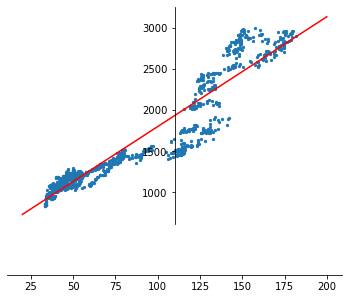

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(20,200,2)

# the function, which is y = x^2 here
y = 466.7106659837523 + 13.336796260539977*x

x_real = np.asarray(df['aapl'])
y_real = np.asarray(df['googl'])

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.scatter(x_real, y_real, s=5)
plt.plot(x,y, 'r')


# show the plot
plt.show()

In [ ]:
for i in range(len())